## Delta Rule Learning



In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('hw2data-2.txt', sep="\t", header=None)
x = data.drop(data.columns[2], axis=1)
y = data[2]
y.head()
# Convert Class-1 and Class-2 into 0's and 1's
for i, val in enumerate(y):
    if val == "Class-1":
        y[i] = 0
    else:
        y[i] = 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
# Sigmoid activation function
def activation_func(value):
    return (1 / (1 + np.exp(-value)))

In [4]:
# Function to return mea squared error
def mse(y_predicted, Y_test):
    return np.sum((y_predicted - Y_test) ** 2)

In [5]:
# Derivative of sigmoid function
def sigmoid_derivative(val):
    return activation_func(val) * (1 - activation_func(val))

In [6]:
# Model to train the perceptron using delta rule
def perceptron_train(x, y, alpha, iterations):
    # converting into numpy
    X = np.array(x)
    # dtype is a numpy.object, converting the array into astype(float)
    # otherwise it will show a message saying numpy.float64 has no attribute log10
    X = X.astype(float) 
    n = X.shape[0]
    Y = np.array(y).reshape(n, 1)
    Y = Y.astype(float) 
    
    # Eandomly initialising random weights 
    # weights = [L-1, L] where L-1 => no of neurons in prev layer, L => neurons in current neurons
    weights = np.random.random(X.shape[1])
    weights = weights.reshape(2, 1)

    # Initialise bias with random bias
    bias = np.ones((1, 1))
    
    # Final arr to include all errors
    loss_arr = []
    
    # Looping over through for N iterations
    for i in range(iterations):
        # Calcuating the predicted values of Y
        z = np.dot(X, weights) + bias
        y_predicted = activation_func(z)
        
        # Calucating mean squared loss
        loss_j = mse(y_predicted, Y)
        
        print('----- ', i, ' ----- || ', loss_j)
        # Delta rule implementation
        weights = weights - alpha * np.dot(np.transpose(X), (sigmoid_derivative(y_predicted) * (y_predicted - Y))) 
       
        # Append the loss error to the final array
        loss_arr.append(loss_j) 
    return (weights, loss_arr)

weights, loss_arr = perceptron_train(x, y, 0.005, 1000)
        

TypeError: random() takes at most 1 positional argument (2 given)

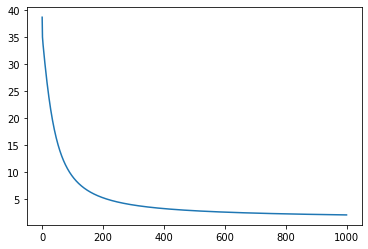

In [460]:
# Plotting the graph for the loss J decreases over time
x_arr = np.arange(0,1000,1)
loss_arr = np.array(loss_arr)
plt.plot(x_arr, loss_arr)

# Using 5-Fold Estimate

In [461]:
# Custom evaluate function to get the predicted value of Y using the sigmoid activation
def evaluate(theta, X_test):
    # Initialise it with random bias
    bias = np.ones((1, 1))
    y_predicted = activation_func(np.dot(X_test, theta) + bias)
    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    return y_predicted

In [462]:
# Import data and create a 2-D matrix out of it
data = open('hw2data-2.txt', 'r') 
Lines = data.readlines()
initial_data = []
for i, line in enumerate(Lines):
    initial_data.append(Lines[i].strip().split('\t'))
# Updating Class-1 and Class-2 into 0's and 1's
for i in initial_data:
    if i[2] == 'Class-1':
        i[2] = 0
    else:
        i[2] = 1

def k_fold():
    # Create training and test variables 
    # K-fold is 20-80% of the total data
    k_fold_value = int(len(initial_data) / 5)
    initial_val = 0
    error_arr = []
    for j in range(k_fold_value, len(initial_data) + 1, k_fold_value):
        X_train, Y_train, X_test, Y_test = [], [], [], []
        for i, val in enumerate(initial_data):
            
            if i > initial_val and i <= j:
                test = []
                test.append(float(val[0]))
                test.append(float(val[1]))
                X_test.append(test)
                Y_test.append(float(val[2]))
            else:
                test = []
                test.append(float(val[0]))
                test.append(float(val[1]))
                X_train.append(test)
                Y_train.append(float(val[2]))
        initial_val += k_fold_value
        
        # Calculate the coefficients of the polynomial
        theta, train_arr = perceptron_train(np.array(X_train), np.array(Y_train), 0.005, 500)
        
        # Predicted value of 'y'
        y_predicted = evaluate(np.array(theta), np.array(X_test))

        # Now, comparing the value of Y_test (actual values) with the predicted values of 'y'
        error = np.sum((y_predicted - Y_test) ** 2) / len(X_train)
        error_arr.append(error)
    return error_arr

errors = k_fold()
mean_error = sum(errors) / len(errors)
mean_error

-----  0  ----- ||  19.402878923785757
-----  1  ----- ||  18.94699312355091
-----  2  ----- ||  18.352489646441867
-----  3  ----- ||  17.835123638434666
-----  4  ----- ||  17.59142121171798
-----  5  ----- ||  17.519639344408162
-----  6  ----- ||  17.46665155610834
-----  7  ----- ||  17.401607921297593
-----  8  ----- ||  17.33049537564561
-----  9  ----- ||  17.257282681919065
-----  10  ----- ||  17.18320642778529
-----  11  ----- ||  17.108598090161134
-----  12  ----- ||  17.033547500499452
-----  13  ----- ||  16.958084197500384
-----  14  ----- ||  16.882223284821322
-----  15  ----- ||  16.805976669124888
-----  16  ----- ||  16.72935575352089
-----  17  ----- ||  16.652372064666842
-----  18  ----- ||  16.575037389551774
-----  19  ----- ||  16.49736379836388
-----  20  ----- ||  16.41936364141551
-----  21  ----- ||  16.34104954011039
-----  22  ----- ||  16.262434376318158
-----  23  ----- ||  16.183531281060453
-----  24  ----- ||  16.1043536226881
-----  25  ----- ||  

-----  253  ----- ||  5.06276195058053
-----  254  ----- ||  5.046069506547157
-----  255  ----- ||  5.029501451473503
-----  256  ----- ||  5.013056527590376
-----  257  ----- ||  4.996733492215423
-----  258  ----- ||  4.9805311175637135
-----  259  ----- ||  4.964448190560223
-----  260  ----- ||  4.948483512654219
-----  261  ----- ||  4.932635899635594
-----  262  ----- ||  4.9169041814530665
-----  263  ----- ||  4.901287202034371
-----  264  ----- ||  4.885783819108345
-----  265  ----- ||  4.87039290402898
-----  266  ----- ||  4.85511334160139
-----  267  ----- ||  4.839944029909741
-----  268  ----- ||  4.8248838801471
-----  269  ----- ||  4.809931816447241
-----  270  ----- ||  4.795086775718367
-----  271  ----- ||  4.780347707478773
-----  272  ----- ||  4.76571357369442
-----  273  ----- ||  4.751183348618424
-----  274  ----- ||  4.736756018632477
-----  275  ----- ||  4.722430582090142
-----  276  ----- ||  4.708206049162044
-----  277  ----- ||  4.694081441682959
----

-----  495  ----- ||  2.984516937661035
-----  496  ----- ||  2.9802335933203175
-----  497  ----- ||  2.9759684025105018
-----  498  ----- ||  2.971721253895557
-----  499  ----- ||  2.967492037023005
-----  0  ----- ||  30.89267636190017
-----  1  ----- ||  30.680922451234302
-----  2  ----- ||  30.065368642028012
-----  3  ----- ||  28.417377165646645
-----  4  ----- ||  25.0047688138852
-----  5  ----- ||  21.336274120449378
-----  6  ----- ||  20.0893834541261
-----  7  ----- ||  19.815440025164456
-----  8  ----- ||  19.599063648780458
-----  9  ----- ||  19.382379571006027
-----  10  ----- ||  19.16768942707028
-----  11  ----- ||  18.95491925658371
-----  12  ----- ||  18.744125841099706
-----  13  ----- ||  18.53535486004435
-----  14  ----- ||  18.328648718102354
-----  15  ----- ||  18.1240461798199
-----  16  ----- ||  17.921582455761936
-----  17  ----- ||  17.721289274509406
-----  18  ----- ||  17.52319496407156
-----  19  ----- ||  17.327324540536782
-----  20  ----- ||

-----  292  ----- ||  3.173254366969977
-----  293  ----- ||  3.163759024219078
-----  294  ----- ||  3.154326795059013
-----  295  ----- ||  3.144957068179538
-----  296  ----- ||  3.1356492398827744
-----  297  ----- ||  3.1264027139687927
-----  298  ----- ||  3.117216901623175
-----  299  ----- ||  3.1080912213065273
-----  300  ----- ||  3.099025098645921
-----  301  ----- ||  3.0900179663282215
-----  302  ----- ||  3.0810692639952455
-----  303  ----- ||  3.072178438140733
-----  304  ----- ||  3.0633449420090892
-----  305  ----- ||  3.054568235495882
-----  306  ----- ||  3.04584778505001
-----  307  ----- ||  3.0371830635775723
-----  308  ----- ||  3.0285735503473763
-----  309  ----- ||  3.020018730898023
-----  310  ----- ||  3.011518096946613
-----  311  ----- ||  3.0030711462989568
-----  312  ----- ||  2.99467738276134
-----  313  ----- ||  2.9863363160537397
-----  314  ----- ||  2.9780474617245383
-----  315  ----- ||  2.969810341066637
-----  316  ----- ||  2.9616244

-----  169  ----- ||  5.629862696558111
-----  170  ----- ||  5.599865538580204
-----  171  ----- ||  5.570222484758777
-----  172  ----- ||  5.540927595019287
-----  173  ----- ||  5.511975056570738
-----  174  ----- ||  5.4833591806245146
-----  175  ----- ||  5.455074399211071
-----  176  ----- ||  5.427115262091144
-----  177  ----- ||  5.399476433758358
-----  178  ----- ||  5.3721526905301875
-----  179  ----- ||  5.34513891772434
-----  180  ----- ||  5.318430106917731
-----  181  ----- ||  5.292021353285341
-----  182  ----- ||  5.265907853016346
-----  183  ----- ||  5.240084900804946
-----  184  ----- ||  5.21454788741352
-----  185  ----- ||  5.1892922973057125
-----  186  ----- ||  5.164313706347214
-----  187  ----- ||  5.139607779572025
-----  188  ----- ||  5.115170269012119
-----  189  ----- ||  5.0909970115884935
-----  190  ----- ||  5.067083927061563
-----  191  ----- ||  5.04342701603915
-----  192  ----- ||  5.020022358040072
-----  193  ----- ||  4.996866109611741

-----  405  ----- ||  2.733632180734396
-----  406  ----- ||  2.7287915544450136
-----  407  ----- ||  2.723976261252787
-----  408  ----- ||  2.71918610791309
-----  409  ----- ||  2.7144209031115207
-----  410  ----- ||  2.7096804574401476
-----  411  ----- ||  2.704964583374109
-----  412  ----- ||  2.7002730952485328
-----  413  ----- ||  2.695605809235808
-----  414  ----- ||  2.69096254332318
-----  415  ----- ||  2.686343117290668
-----  416  ----- ||  2.681747352689306
-----  417  ----- ||  2.6771750728196855
-----  418  ----- ||  2.6726261027108267
-----  419  ----- ||  2.668100269099326
-----  420  ----- ||  2.663597400408828
-----  421  ----- ||  2.659117326729769
-----  422  ----- ||  2.654659879799422
-----  423  ----- ||  2.650224892982218
-----  424  ----- ||  2.6458122012503527
-----  425  ----- ||  2.6414216411646576
-----  426  ----- ||  2.63705305085575
-----  427  ----- ||  2.6327062700054444
-----  428  ----- ||  2.628381139828422
-----  429  ----- ||  2.6240775030

-----  132  ----- ||  6.907597628135239
-----  133  ----- ||  6.867741986255686
-----  134  ----- ||  6.828426206019649
-----  135  ----- ||  6.789640016308807
-----  136  ----- ||  6.751373391593208
-----  137  ----- ||  6.713616544982115
-----  138  ----- ||  6.676359921498174
-----  139  ----- ||  6.639594191566978
-----  140  ----- ||  6.603310244714457
-----  141  ----- ||  6.567499183464818
-----  142  ----- ||  6.532152317432015
-----  143  ----- ||  6.497261157597938
-----  144  ----- ||  6.4628174107708904
-----  145  ----- ||  6.428812974218027
-----  146  ----- ||  6.395239930465735
-----  147  ----- ||  6.362090542262154
-----  148  ----- ||  6.329357247696249
-----  149  ----- ||  6.297032655468026
-----  150  ----- ||  6.265109540304714
-----  151  ----- ||  6.233580838517921
-----  152  ----- ||  6.20243964369695
-----  153  ----- ||  6.171679202533642
-----  154  ----- ||  6.141292910774264
-----  155  ----- ||  6.111274309294166
-----  156  ----- ||  6.081617080291055


-----  364  ----- ||  3.4024213729945987
-----  365  ----- ||  3.396891884549259
-----  366  ----- ||  3.3913927436204476
-----  367  ----- ||  3.385923700461406
-----  368  ----- ||  3.3804845080260284
-----  369  ----- ||  3.3750749219329452
-----  370  ----- ||  3.3696947004301725
-----  371  ----- ||  3.3643436043603323
-----  372  ----- ||  3.359021397126389
-----  373  ----- ||  3.3537278446579535
-----  374  ----- ||  3.3484627153780724
-----  375  ----- ||  3.343225780170572
-----  376  ----- ||  3.3380168123478775
-----  377  ----- ||  3.332835587619343
-----  378  ----- ||  3.3276818840600777
-----  379  ----- ||  3.3225554820802286
-----  380  ----- ||  3.3174561643947587
-----  381  ----- ||  3.3123837159936693
-----  382  ----- ||  3.3073379241126872
-----  383  ----- ||  3.302318578204398
-----  384  ----- ||  3.297325469909805
-----  385  ----- ||  3.2923583930303497
-----  386  ----- ||  3.287417143500316
-----  387  ----- ||  3.282501519359682
-----  388  ----- ||  3.2

-----  229  ----- ||  4.621311577968387
-----  230  ----- ||  4.6064335997466985
-----  231  ----- ||  4.591682509545921
-----  232  ----- ||  4.577056740989533
-----  233  ----- ||  4.5625547527040355
-----  234  ----- ||  4.548175027833142
-----  235  ----- ||  4.533916073562984
-----  236  ----- ||  4.519776420658152
-----  237  ----- ||  4.505754623008173
-----  238  ----- ||  4.491849257184257
-----  239  ----- ||  4.478058922005975
-----  240  ----- ||  4.464382238117667
-----  241  ----- ||  4.450817847574286
-----  242  ----- ||  4.437364413436471
-----  243  ----- ||  4.424020619374613
-----  244  ----- ||  4.410785169281647
-----  245  ----- ||  4.397656786894402
-----  246  ----- ||  4.384634215423261
-----  247  ----- ||  4.371716217189932
-----  248  ----- ||  4.3589015732731236
-----  249  ----- ||  4.346189083161934
-----  250  ----- ||  4.3335775644167525
-----  251  ----- ||  4.321065852337511
-----  252  ----- ||  4.308652799639047
-----  253  ----- ||  4.296337276133

0.86

# 2(c)


> In a binary sigmoid function, the values are between 0 and 1, excluding 0 and 1. So, even the best model will not generate an error of 0 using binary sigmoid function, rather it could get very close to 0. 